# Bike Sharing Demand - Modeling

https://www.kaggle.com/c/bike-sharing-demand/data

Plan

1. Load Data
2. Roughly view data and columns
3. Data Checking
4. Plotting Data - Try to find pattern
5. Modeling

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns # for chart

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load data

In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sampleSubmission = pd.read_csv("./data/sampleSubmission.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [47]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
sampleSubmission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Change Data

Train data

In [6]:
train['year'] = train.ix[:,"datetime"].str[0:4]
train['month'] = train.ix[:,"datetime"].str[5:7]
train['day'] = train.ix[:,"datetime"].str[8:11]
train['hour'] = train.ix[:,"datetime"].str[11:13]
train[['year', 'month', 'day', 'hour']] = train[['year', 'month', 'day', 'hour']].astype(long)
train.head()

In [59]:
test['year'] = test.ix[:,"datetime"].str[0:4]
test['month'] = test.ix[:,"datetime"].str[5:7]
test['day'] = test.ix[:,"datetime"].str[8:11]
test['hour'] = test.ix[:,"datetime"].str[11:13]
test[['year', 'month', 'day', 'hour']] = test[['year', 'month', 'day', 'hour']].astype(long)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## Modeling

Now its time to model...

By using http://brandonharris.io/kaggle-bike-sharing/ as reference

In [11]:
from sklearn.ensemble import RandomForestRegressor
import math

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 1.4+ MB


### Simple model on 'count'

In [49]:
dropCols = ['datetime', 'year', 'month', 'day', 'casual', 'registered', 'count']
testDropCols = ['datetime', 'year', 'month', 'day']

In [14]:
target = train.filter(['count'])
trainToRun = train.drop(dropCols, axis=1)
trainToRun.info()

In [27]:
trainToRun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 9 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
hour          10886 non-null int64
dtypes: float64(3), int64(6)
memory usage: 850.5 KB


In [52]:
testToRun = test.drop(testDropCols, axis=1)
testToRun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6492
Data columns (total 9 columns):
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
hour          6493 non-null int64
dtypes: float64(3), int64(6)
memory usage: 507.3 KB


In [16]:
model = RandomForestRegressor(n_estimators=100, n_jobs=1)
model.fit(trainToRun, target.values.reshape(target.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [17]:
predictions = np.array(model.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(target.values).reshape(np.array(target.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 26.3826859168
10 Most Important Variables:[('hour', 0.60031474130380769), ('temp', 0.10359794232190739), ('workingday', 0.070824592716371898), ('humidity', 0.070045511201070318), ('atemp', 0.052494213547031751), ('season', 0.039375903778512085), ('windspeed', 0.037519962084776121), ('weather', 0.02207546309375423), ('holiday', 0.0037516699527688074)]


Predict test and subFile out

In [64]:
subFile = pd.concat([test.datetime, pd.Series(np.array(model.predict(testToRun)))], axis = 1)
subFile.columns = ['datetime', 'count']

In [69]:
subFile.to_csv('./subfile.csv', index=False)

In [86]:
from IPython.display import Image

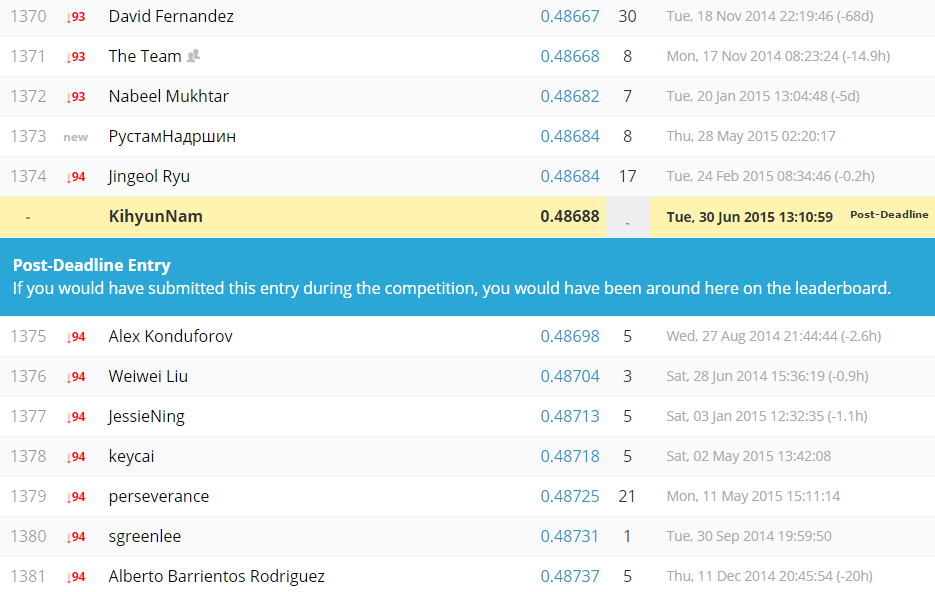

In [87]:
Image(filename='./image/1st_try.png')

### Additive Model - using 'casual' and 'registered'

In [70]:
dropCols = ['datetime', 'year', 'month', 'day', 'casual', 'registered', 'count']
testDropCols = ['datetime', 'year', 'month', 'day']

In [71]:
targetCasual = train.filter(['casual'])
targetRegistered = train.filter(['registered'])
trainToRun = train.drop(dropCols, axis=1)
trainToRun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 9 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
hour          10886 non-null int64
dtypes: float64(3), int64(6)
memory usage: 850.5 KB


In [72]:
testToRun = test.drop(testDropCols, axis=1)
testToRun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6492
Data columns (total 9 columns):
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
hour          6493 non-null int64
dtypes: float64(3), int64(6)
memory usage: 507.3 KB


In [78]:
modelCasual = RandomForestRegressor(n_estimators=100, n_jobs=1)
modelCasual.fit(trainToRun, targetCasual.values.reshape(targetCasual.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [79]:
predictions = np.array(modelCasual.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(targetCasual.values).reshape(np.array(targetCasual.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, modelCasual.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 6.77631799647
10 Most Important Variables:[('hour', 0.35565219849479546), ('atemp', 0.21526902962908634), ('workingday', 0.18367045784923644), ('temp', 0.08955794384250991), ('humidity', 0.076845316163159566), ('windspeed', 0.037047265160696133), ('season', 0.02221286054895669), ('weather', 0.011907131671759313), ('holiday', 0.0078377966398001306)]


In [80]:
modelRegistered = RandomForestRegressor(n_estimators=100, n_jobs=1)
modelRegistered.fit(trainToRun, targetRegistered.values.reshape(targetRegistered.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [81]:
predictions = np.array(modelRegistered.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(targetRegistered.values).reshape(np.array(targetRegistered.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, modelRegistered.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 23.2214006386
10 Most Important Variables:[('hour', 0.55931837138292739), ('workingday', 0.14130730767728203), ('humidity', 0.068753765827805055), ('temp', 0.06634670197424053), ('season', 0.057517083642297386), ('atemp', 0.042591187285281898), ('windspeed', 0.039152801239183369), ('weather', 0.021852965854697176), ('holiday', 0.0031598151162853146)]


Predict and subFile2 out

In [82]:
subFile2 = pd.concat([test.datetime, pd.Series(np.array(modelCasual.predict(testToRun))), pd.Series(np.array(modelRegistered.predict(testToRun)))], axis = 1)
subFile2.columns = ['datetime', 'casual', 'registered']
subFile2.head()

,datetime,casual,registered
0,2011-01-20 00:00:00,2.200000,11.380000
1,2011-01-20 01:00:00,0.946667,5.098095
2,2011-01-20 02:00:00,1.590000,3.170000
3,2011-01-20 03:00:00,0.360000,3.065000
4,2011-01-20 04:00:00,0.160000,2.330000


In [84]:
subFile2['count'] = subFile2.casual + subFile2.registered
subFile2.head()

,datetime,casual,registered,count
0,2011-01-20 00:00:00,2.200000,11.380000,13.580000
1,2011-01-20 01:00:00,0.946667,5.098095,6.044762
2,2011-01-20 02:00:00,1.590000,3.170000,4.760000
3,2011-01-20 03:00:00,0.360000,3.065000,3.425000
4,2011-01-20 04:00:00,0.160000,2.330000,2.490000


In [ ]:
subFile2.ix[:,['datetime', 'count']].to_csv("./subFile2.csv", index=False)

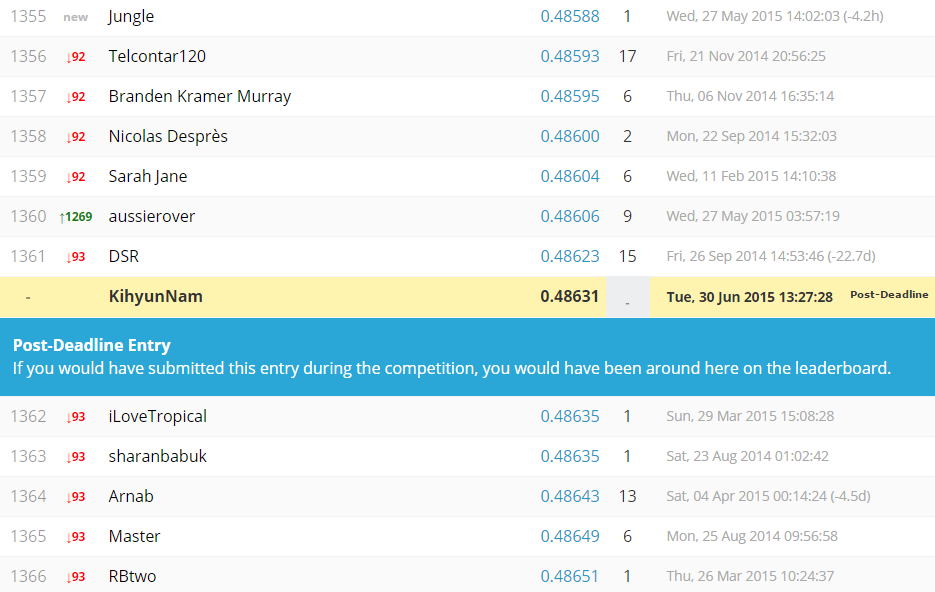

In [88]:
Image(filename='./image/2nd_try.png')

Not much improvement. Based on RMSE for models, it seems like model for registered user should be more refined.

In [49]:
from sklearn import preprocessing
scaled = preprocessing.scale(trainToRun['temp'])

In [51]:
trainToRun['temp'] = scaled

(array([   69.,   648.,  1440.,  1891.,  1587.,  1753.,  1901.,  1194.,
          355.,    48.]),
 array([-2.49137234, -1.97566443, -1.45995651, -0.94424859, -0.42854068,
         0.08716724,  0.60287516,  1.11858307,  1.63429099,  2.1499989 ,
         2.66570682]),
 <a list of 10 Patch objects>)

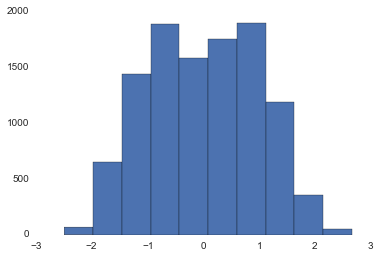

In [52]:
plt.hist(trainToRun['temp'])

In [53]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(trainToRun, target.values.reshape(target.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0)

In [54]:
predictions = np.array(model.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(target.values).reshape(np.array(target.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 26.4530536809
10 Most Important Variables:[('hour', 0.59714292239955702), ('temp', 0.10046169991599264), ('workingday', 0.073264362305822561), ('humidity', 0.069667806293498655), ('atemp', 0.056166263546937281), ('season', 0.039648746144674535), ('windspeed', 0.037803025934846329), ('weather', 0.022173318858467832), ('holiday', 0.0036718546002030266)]


똑같다. important가. 그럼 상관 없는건가?

In [56]:
trainToRun.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,0.000000,23.655084,61.886460,12.799395,11.541613
std,1.116174,0.166599,0.466159,0.633839,1.000046,8.474601,19.245033,8.164537,6.915838
min,1.000000,0.000000,0.000000,1.000000,-2.491372,0.760000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,-0.807428,16.665000,47.000000,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,0.034544,24.240000,62.000000,12.998000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,0.771270,31.060000,77.000000,16.997900,18.000000
max,4.000000,1.000000,1.000000,4.000000,2.665707,45.455000,100.000000,56.996900,23.000000


Max값이 제일큰 himidity로 해보자. 

In [63]:
scaled = preprocessing.scale(trainToRun['humidity'].astype(float))

(array([   23.,    45.,   364.,  1039.,  1727.,  1842.,  1748.,  1736.,
         1676.,   686.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

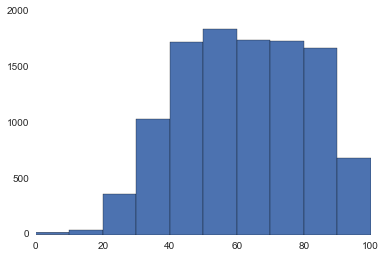

In [64]:
plt.hist(trainToRun['humidity'])

(array([   23.,    45.,   364.,  1039.,  1917.,  1652.,  1748.,  1796.,
         1616.,   686.]),
 array([-3.21585842, -2.69621997, -2.17658151, -1.65694306, -1.13730461,
        -0.61766615, -0.0980277 ,  0.42161076,  0.94124921,  1.46088766,
         1.98052612]),
 <a list of 10 Patch objects>)

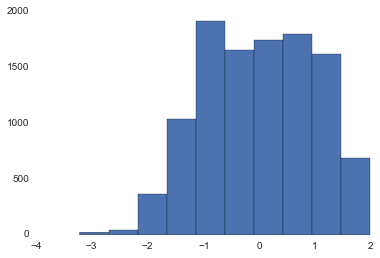

In [65]:
plt.hist(scaled)

In [66]:
trainToRun['humidity'] = scaled

In [68]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(trainToRun, target.values.reshape(target.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0)

In [69]:
predictions = np.array(model.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(target.values).reshape(np.array(target.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 26.4692399015
10 Most Important Variables:[('hour', 0.59947121651793867), ('temp', 0.10186744538722163), ('workingday', 0.071343891711119295), ('humidity', 0.069030071736206913), ('atemp', 0.054919032970338622), ('season', 0.039756127884513569), ('windspeed', 0.037496005872026603), ('weather', 0.022545080696680455), ('holiday', 0.0035711272239541841)]


In [70]:
trainToRun.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,0.000000,23.655084,1.148774e-16,12.799395,11.541613
std,1.116174,0.166599,0.466159,0.633839,1.000046,8.474601,1.000046e+00,8.164537,6.915838
min,1.000000,0.000000,0.000000,1.000000,-2.491372,0.760000,-3.215858e+00,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,-0.807428,16.665000,-7.735577e-01,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,0.034544,24.240000,5.899992e-03,12.998000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,0.771270,31.060000,7.853577e-01,16.997900,18.000000
max,4.000000,1.000000,1.000000,4.000000,2.665707,45.455000,1.980526e+00,56.996900,23.000000


Normalize 해줄 필요가 없는게 맞나보다. importance에서 바뀐게 없다.

## 2. get_dummies for some variables

In [84]:
trainToRun = pd.concat([trainToRun, pd.get_dummies(train['season'], prefix='season')], axis=1)
trainToRun = pd.concat([trainToRun, pd.get_dummies(train['weather'], prefix='weather')], axis=1)
trainToRun = pd.concat([trainToRun, pd.get_dummies(train['hour'], prefix='hour')], axis=1)

In [76]:
dropCols = ['season', 'weather','hour']

In [77]:
trainToRun = trainToRun.drop(dropCols, axis=1)

In [85]:
trainToRun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 41 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
hour          10886 non-null int64
season_1      10886 non-null float64
season_2      10886 non-null float64
season_3      10886 non-null float64
season_4      10886 non-null float64
weather_1     10886 non-null float64
weather_2     10886 non-null float64
weather_3     10886 non-null float64
weather_4     10886 non-null float64
hour_0        10886 non-null float64
hour_1        10886 non-null float64
hour_2        10886 non-null float64
hour_3        10886 non-null float64
hour_4        10886 non-null float64
hour_5        10886 non-null float64
hour_6        10886 non-null float64
hour_7        1

In [88]:
#model = None
#trainToRun = None

In [100]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(trainToRun, target.values.reshape(target.values.shape[0],))

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0)

In [101]:
predictions = np.array(model.predict(trainToRun))
rmse = math.sqrt(np.mean((np.array(target.values).reshape(np.array(target.values).shape[0],) - predictions)**2))
imp = sorted(zip(trainToRun.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)

print "RMSE: " + str(rmse)
print "10 Most Important Variables:" + str(imp[:10])

RMSE: 27.0574854241
10 Most Important Variables:[('hour', 0.46383881234678925), ('temp', 0.099122964446231379), ('workingday', 0.072743221323904178), ('humidity', 0.067822804472034343), ('atemp', 0.056772861777563931), ('hour_17', 0.046378564407504055), ('hour_18', 0.037007017070218223), ('windspeed', 0.036034621622099659), ('hour_8', 0.026438901408469072), ('season', 0.020741107529954686)]


In [97]:
%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (1 entries)


In [102]:
del model

In [103]:
import gc

In [111]:
gc.collect()

7

In [106]:
%whos

Variable                Type         Data/Info
----------------------------------------------
RandomForestRegressor   ABCMeta      <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
col                     str          count
dropCols                list         n=7
gc                      module       <module 'gc' (built-in)>
imp                     list         n=41
pd                      module       <module 'pandas' from 'C:<...>ges\pandas\__init__.pyc'>
predictions             ndarray      10886L: 10886 elems, type `float64`, 87088 bytes
preprocessing           module       <module 'sklearn.preproce<...>processing\__init__.pyc'>
rmse                    float        27.0574854241
sampleSubmission        DataFrame                     datetime<...>\n[6493 rows x 2 columns]
scaled                  ndarray      10886L: 10886 elems, type `float64`, 87088 bytes
sns                     module       <module 'seaborn' from 'C<...>es\seaborn\__init__.pyc'>
target                  DataFr

In [107]:
%reset array

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [110]:
%xdel testcube

NameError: name 'testcube' is not defined
